# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = 'Imperial'
print("Beginning Data Retrieval")
print("--------------------------")

# Use a for loop to interate through the cities and determine the weather related data
Set = 1
city_count = 0

for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_report = weather_json["weather"][0]["description"]
        print(f'Processing Record {city_count} of Set {Set} | {city}')
        print(f'Weather in {city} is {weather_report}')
        city_count += 1
        if city_count == 50 :
            Set += 1 
            city_count = 0
            # Use the time.sleep() method to slow down the rate of the api requests. The OpenWeatherMap api resource
            # only allows 60 requests per minute. 
            time.sleep(30)    
    except KeyError:
        print('City not found. Skipping...')

print("--------------------------")
print("Data Retrieval Complete ")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 0 of Set 1 | novoagansk
Weather in novoagansk is overcast clouds
Processing Record 1 of Set 1 | narsaq
Weather in narsaq is overcast clouds
Processing Record 2 of Set 1 | cabo san lucas
Weather in cabo san lucas is clear sky
Processing Record 3 of Set 1 | vaini
Weather in vaini is broken clouds
Processing Record 4 of Set 1 | tucuman
Weather in tucuman is few clouds
Processing Record 5 of Set 1 | kenai
Weather in kenai is clear sky
Processing Record 6 of Set 1 | ponta do sol
Weather in ponta do sol is broken clouds
City not found. Skipping...
Processing Record 7 of Set 1 | tasiilaq
Weather in tasiilaq is overcast clouds
Processing Record 8 of Set 1 | saskylakh
Weather in saskylakh is overcast clouds
Processing Record 9 of Set 1 | punta arenas
Weather in punta arenas is broken clouds
Processing Record 10 of Set 1 | fare
Weather in fare is broken clouds
Processing Record 11 of Set 1 | avarua
Weather in avarua is few clo

Processing Record 2 of Set 3 | esperance
Weather in esperance is clear sky
Processing Record 3 of Set 3 | namuac
Weather in namuac is clear sky
Processing Record 4 of Set 3 | ancud
Weather in ancud is light rain
Processing Record 5 of Set 3 | assiniboia
Weather in assiniboia is overcast clouds
Processing Record 6 of Set 3 | beringovskiy
Weather in beringovskiy is overcast clouds
Processing Record 7 of Set 3 | saint-philippe
Weather in saint-philippe is light rain
Processing Record 8 of Set 3 | clyde river
Weather in clyde river is light snow
Processing Record 9 of Set 3 | geraldton
Weather in geraldton is overcast clouds
Processing Record 10 of Set 3 | victoria
Weather in victoria is clear sky
Processing Record 11 of Set 3 | pangnirtung
Weather in pangnirtung is overcast clouds
Processing Record 12 of Set 3 | atuona
Weather in atuona is clear sky
Processing Record 13 of Set 3 | lebu
Weather in lebu is overcast clouds
Processing Record 14 of Set 3 | raymond
Weather in raymond is few clo

Processing Record 3 of Set 5 | rundu
Weather in rundu is few clouds
Processing Record 4 of Set 5 | nerchinskiy zavod
Weather in nerchinskiy zavod is few clouds
Processing Record 5 of Set 5 | pangody
Weather in pangody is overcast clouds
City not found. Skipping...
Processing Record 6 of Set 5 | hualmay
Weather in hualmay is clear sky
Processing Record 7 of Set 5 | qaqortoq
Weather in qaqortoq is overcast clouds
City not found. Skipping...
Processing Record 8 of Set 5 | sola
Weather in sola is broken clouds
Processing Record 9 of Set 5 | omboue
Weather in omboue is overcast clouds
Processing Record 10 of Set 5 | whitehorse
Weather in whitehorse is broken clouds
Processing Record 11 of Set 5 | koulamoutou
Weather in koulamoutou is moderate rain
Processing Record 12 of Set 5 | tiksi
Weather in tiksi is overcast clouds
Processing Record 13 of Set 5 | moron
Weather in moron is clear sky
Processing Record 14 of Set 5 | talnakh
Weather in talnakh is overcast clouds
Processing Record 15 of Set

Processing Record 6 of Set 7 | cairns
Weather in cairns is broken clouds
Processing Record 7 of Set 7 | aleksandrov gay
Weather in aleksandrov gay is overcast clouds
Processing Record 8 of Set 7 | jishu
Weather in jishu is clear sky
Processing Record 9 of Set 7 | lahat
Weather in lahat is overcast clouds
Processing Record 10 of Set 7 | zhigansk
Weather in zhigansk is broken clouds
Processing Record 11 of Set 7 | porto santo
Weather in porto santo is few clouds
Processing Record 12 of Set 7 | sur
Weather in sur is clear sky
Processing Record 13 of Set 7 | saint-augustin
Weather in saint-augustin is overcast clouds
Processing Record 14 of Set 7 | sisimiut
Weather in sisimiut is overcast clouds
Processing Record 15 of Set 7 | bathsheba
Weather in bathsheba is broken clouds
Processing Record 16 of Set 7 | namibe
Weather in namibe is clear sky
Processing Record 17 of Set 7 | inuvik
Weather in inuvik is few clouds
Processing Record 18 of Set 7 | masuguru
Weather in masuguru is light rain
Pro

Processing Record 8 of Set 9 | gilbues
Weather in gilbues is overcast clouds
City not found. Skipping...
Processing Record 9 of Set 9 | teguise
Weather in teguise is few clouds
Processing Record 10 of Set 9 | srednekolymsk
Weather in srednekolymsk is overcast clouds
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 9 | soubre
Weather in soubre is moderate rain
Processing Record 12 of Set 9 | sattur
Weather in sattur is few clouds
Processing Record 13 of Set 9 | odweyne
Weather in odweyne is light rain
Processing Record 14 of Set 9 | horsham
Weather in horsham is clear sky
Processing Record 15 of Set 9 | uaua
Weather in uaua is overcast clouds
Processing Record 16 of Set 9 | marsh harbour
Weather in marsh harbour is clear sky
Processing Record 17 of Set 9 | shimoda
Weather in shimoda is scattered clouds
Processing Record 18 of Set 9 | wloszczowa
Weather in wloszczowa is moderate rain
Processing Record 19 of Set 9 | tabanan
Weather in tabanan is few clou

Processing Record 9 of Set 11 | wuwei
Weather in wuwei is overcast clouds
Processing Record 10 of Set 11 | naron
Weather in naron is overcast clouds
Processing Record 11 of Set 11 | maxixe
Weather in maxixe is few clouds
City not found. Skipping...
Processing Record 12 of Set 11 | rocha
Weather in rocha is clear sky
Processing Record 13 of Set 11 | tarn taran
Weather in tarn taran is clear sky
Processing Record 14 of Set 11 | mount pleasant
Weather in mount pleasant is clear sky
Processing Record 15 of Set 11 | cootamundra
Weather in cootamundra is overcast clouds
City not found. Skipping...
Processing Record 16 of Set 11 | kedougou
Weather in kedougou is clear sky
Processing Record 17 of Set 11 | urla
Weather in urla is few clouds
Processing Record 18 of Set 11 | cockburn town
Weather in cockburn town is scattered clouds
Processing Record 19 of Set 11 | isangel
Weather in isangel is overcast clouds
Processing Record 20 of Set 11 | florianopolis
Weather in florianopolis is scattered cl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
# Create a dataframe to house the city weather data 
city_weather = pd.DataFrame({'City': cities, 'Lat': "", 'Lng': "", 'Max Temp': '', 'Humidity': "", 'Cloudiness': "",\
                             'Wind Speed': "", 'Country': "", 'Date': ""})

city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novoagansk,,,,,,,,
1,narsaq,,,,,,,,
2,cabo san lucas,,,,,,,,
3,vaini,,,,,,,,
4,tucuman,,,,,,,,
5,kenai,,,,,,,,
6,ponta do sol,,,,,,,,
7,mys shmidta,,,,,,,,
8,tasiilaq,,,,,,,,
9,saskylakh,,,,,,,,


In [61]:
# Continue to build the dataframe by inputting the missing data for each city 

city_count = 0

for index, row in city_weather.iterrows():
    city_name = row['City']
    print(f"Retrieving Results for Index {index}: {city_name}.")
    
    # Try statement included to allow script to continue if any errors are encountered during the search
    
    try:
        query_url = f"{url}appid={weather_api_key}&q={city_name}&units={units}"
        # Get weather data
        weather_response = requests.get(query_url).json()
        city_weather.loc[index, 'Lat'] = weather_response['coord']['lat']
        city_weather.loc[index, 'Lng'] = weather_response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        city_weather.loc[index, 'Humidity'] = weather_response['main']['humidity']
        city_weather.loc[index, 'Cloudiness'] = weather_response['clouds']['all']
        city_weather.loc[index, 'Wind Speed'] = weather_response['wind']['speed']
        city_weather.loc[index, 'Country'] = weather_response['sys']['country']
        city_weather.loc[index, 'Date'] = weather_response['dt']
        city_count += 1
        # Use the time.sleep() method to slow down the rate of the api requests. The OpenWeatherMap api resource
        # only allows 60 requests per minute. 
        if city_count == 50 :
            city_count = 0
            time.sleep(30) 
    # except statement (handling key errors and index errors)  
    
    except (KeyError, IndexError):
        
        # simple print statement
        print("Missing field/result... skipping.")
        pass 

print("--------------------------")
print("Data Retrieval Complete ")
print("--------------------------")

Retrieving Results for Index 0: novoagansk.
Retrieving Results for Index 1: narsaq.
Retrieving Results for Index 2: cabo san lucas.
Retrieving Results for Index 3: vaini.
Retrieving Results for Index 4: tucuman.
Retrieving Results for Index 5: kenai.
Retrieving Results for Index 6: ponta do sol.
Retrieving Results for Index 7: mys shmidta.
Missing field/result... skipping.
Retrieving Results for Index 8: tasiilaq.
Retrieving Results for Index 9: saskylakh.
Retrieving Results for Index 10: punta arenas.
Retrieving Results for Index 11: fare.
Retrieving Results for Index 12: avarua.
Retrieving Results for Index 13: kichmengskiy gorodok.
Retrieving Results for Index 14: qaanaaq.
Retrieving Results for Index 15: jamestown.
Retrieving Results for Index 16: weligama.
Retrieving Results for Index 17: seoul.
Retrieving Results for Index 18: chuy.
Retrieving Results for Index 19: hermanus.
Retrieving Results for Index 20: ushuaia.
Retrieving Results for Index 21: sentyabrskiy.
Missing field/res

Missing field/result... skipping.
Retrieving Results for Index 180: ilulissat.
Retrieving Results for Index 181: santa maria.
Retrieving Results for Index 182: la quinta.
Retrieving Results for Index 183: krasnozerskoye.
Retrieving Results for Index 184: half moon bay.
Retrieving Results for Index 185: pimentel.
Retrieving Results for Index 186: christchurch.
Retrieving Results for Index 187: santa cruz.
Retrieving Results for Index 188: naze.
Retrieving Results for Index 189: port lincoln.
Retrieving Results for Index 190: kuche.
Missing field/result... skipping.
Retrieving Results for Index 191: lincoln.
Retrieving Results for Index 192: east london.
Retrieving Results for Index 193: guajara-mirim.
Missing field/result... skipping.
Retrieving Results for Index 194: husavik.
Retrieving Results for Index 195: saint george.
Retrieving Results for Index 196: pousat.
Missing field/result... skipping.
Retrieving Results for Index 197: leh.
Retrieving Results for Index 198: luderitz.
Retrie

Retrieving Results for Index 352: fort william.
Retrieving Results for Index 353: alugan.
Retrieving Results for Index 354: ewa beach.
Retrieving Results for Index 355: kemin.
Retrieving Results for Index 356: nizhneyansk.
Missing field/result... skipping.
Retrieving Results for Index 357: aklavik.
Retrieving Results for Index 358: ribeira grande.
Retrieving Results for Index 359: penzance.
Retrieving Results for Index 360: tura.
Retrieving Results for Index 361: pompeia.
Retrieving Results for Index 362: keetmanshoop.
Retrieving Results for Index 363: kochi.
Retrieving Results for Index 364: iralaya.
Retrieving Results for Index 365: rungata.
Missing field/result... skipping.
Retrieving Results for Index 366: shar.
Retrieving Results for Index 367: porosozero.
Retrieving Results for Index 368: peleduy.
Retrieving Results for Index 369: meyungs.
Missing field/result... skipping.
Retrieving Results for Index 370: bekhteyevka.
Retrieving Results for Index 371: mociu.
Retrieving Results f

Retrieving Results for Index 528: chiang khong.
Retrieving Results for Index 529: kurilsk.
Retrieving Results for Index 530: san pancrazio salentino.
Retrieving Results for Index 531: tuburan.
Retrieving Results for Index 532: hihifo.
Missing field/result... skipping.
Retrieving Results for Index 533: maniitsoq.
Retrieving Results for Index 534: mackay.
Retrieving Results for Index 535: bacuit.
Missing field/result... skipping.
Retrieving Results for Index 536: marathon.
Retrieving Results for Index 537: umm kaddadah.
Retrieving Results for Index 538: matola.
Retrieving Results for Index 539: cocobeach.
Retrieving Results for Index 540: derzhavinsk.
Retrieving Results for Index 541: port shepstone.
Retrieving Results for Index 542: adamovka.
Retrieving Results for Index 543: soyo.
Retrieving Results for Index 544: sinnamary.
Retrieving Results for Index 545: sai buri.
Retrieving Results for Index 546: umzimvubu.
Missing field/result... skipping.
Retrieving Results for Index 547: matay.

In [62]:
# Display the dataframe to assess the results of the API request and assignments
city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novoagansk,61.9449,76.6625,21.11,98,100,3.94,RU,1650825908
1,narsaq,60.9167,-46.05,50.22,79,100,3.29,GL,1650825908
2,cabo san lucas,22.8909,-109.9124,81.61,62,0,7.38,MX,1650826075
3,vaini,-21.2,-175.2,69.96,94,75,1.14,TO,1650826075
4,tucuman,-26.8241,-65.2226,78.8,61,20,3.44,AR,1650826031
5,kenai,60.5544,-151.2583,44.69,87,0,8.05,US,1650826076
6,ponta do sol,32.6667,-17.1,66.7,71,80,7.34,PT,1650826076
7,mys shmidta,,,,,,,,
8,tasiilaq,65.6145,-37.6368,41.16,70,100,3.91,GL,1650826008
9,saskylakh,71.9167,114.0833,-7.94,100,85,2.46,RU,1650826077


In [63]:
# Export file as a CSV, without the Pandas index, but with the header

city_weather.to_csv("weather_report1.csv", index=False, header=True)

In [64]:
# Create a new dataframe that keeps the columns with values to allow for further analysis 
city_weather_limited = pd.DataFrame({'Lat':city_weather['Lat'],'Lng':city_weather['Lng'],\
                                     'Max Temp':city_weather['Max Temp'],'Humidity':city_weather['Humidity'],\
                                     'Cloudiness':city_weather['Cloudiness'],\
                                     'Wind Speed':city_weather['Wind Speed'], 'Date':city_weather['Date']})
city_weather_limited

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,61.9449,76.6625,21.11,98,100,3.94,1650825908
1,60.9167,-46.05,50.22,79,100,3.29,1650825908
2,22.8909,-109.9124,81.61,62,0,7.38,1650826075
3,-21.2,-175.2,69.96,94,75,1.14,1650826075
4,-26.8241,-65.2226,78.8,61,20,3.44,1650826031
5,60.5544,-151.2583,44.69,87,0,8.05,1650826076
6,32.6667,-17.1,66.7,71,80,7.34,1650826076
7,,,,,,,
8,65.6145,-37.6368,41.16,70,100,3.91,1650826008
9,71.9167,114.0833,-7.94,100,85,2.46,1650826077


In [65]:
len(city_weather_limited)

633

In [66]:
# Replacing the empty cells with NaN that would allow us to remove those rows next 

city_weather_limited['Lat'].replace('', np.nan, inplace=True)
city_weather_limited['Lng'].replace('', np.nan, inplace=True)
city_weather_limited['Max Temp'].replace('', np.nan, inplace=True)
city_weather_limited['Humidity'].replace('', np.nan, inplace=True)
city_weather_limited['Cloudiness'].replace('', np.nan, inplace=True)
city_weather_limited['Wind Speed'].replace('', np.nan, inplace=True)
city_weather_limited['Date'].replace('', np.nan, inplace=True)

# Display the complete database to scan for the NaN rows
pd.set_option('display.max_rows', None)

city_weather_limited

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,61.9449,76.6625,21.11,98.0,100.0,3.94,1.650826e+09
1,60.9167,-46.0500,50.22,79.0,100.0,3.29,1.650826e+09
2,22.8909,-109.9124,81.61,62.0,0.0,7.38,1.650826e+09
3,-21.2000,-175.2000,69.96,94.0,75.0,1.14,1.650826e+09
4,-26.8241,-65.2226,78.80,61.0,20.0,3.44,1.650826e+09
5,60.5544,-151.2583,44.69,87.0,0.0,8.05,1.650826e+09
6,32.6667,-17.1000,66.70,71.0,80.0,7.34,1.650826e+09
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,65.6145,-37.6368,41.16,70.0,100.0,3.91,1.650826e+09
9,71.9167,114.0833,-7.94,100.0,85.0,2.46,1.650826e+09


In [67]:
# Drop the NaN rows
city_weather_limited = city_weather_limited.dropna()

In [68]:
len(city_weather_limited)

581

In [69]:
city_weather_limited = city_weather_limited.reset_index()

In [70]:
# Check the data types for the remaining data
city_weather_limited.dtypes

index           int64
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Date          float64
dtype: object

In [71]:
# Use the describe method to display a statistical summary of the values for each column 
city_weather_limited.describe()

,index,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,316.919105,20.719305,21.565535,61.056317,70.160069,60.915663,8.095835,1.650826e+09
std,183.744253,33.324278,88.868571,22.069211,22.531668,40.126843,5.726954,1.871619e+02
min,0.000000,-54.800000,-175.200000,-14.690000,1.000000,0.000000,0.000000,1.650825e+09
25%,155.000000,-6.897600,-53.673500,46.450000,58.000000,20.000000,3.960000,1.650826e+09
50%,320.000000,26.124700,25.570100,64.450000,76.000000,75.000000,6.550000,1.650826e+09
75%,476.000000,50.100100,101.616800,78.690000,87.000000,100.000000,11.500000,1.650826e+09
max,632.000000,78.218600,179.316700,106.380000,100.000000,100.000000,43.730000,1.650826e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
# Display the records where humidity is > 100%
humidity_city_data = city_weather_limited[city_weather_limited['Humidity'] > 100]
humidity_city_data

,index,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [73]:
#  Get the indices of cities that have humidity over 100%.
humidity_city_data = city_weather_limited[(city_weather_limited['Humidity'] > 100)].index
humidity_city_data

Int64Index([], dtype='int64')

#### There are no cities with a humidity > 100%

In [74]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [75]:
clean_city_data = city_weather_limited

clean_city_data

,index,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,61.9449,76.6625,21.11,98.0,100.0,3.94,1.650826e+09
1,1,60.9167,-46.0500,50.22,79.0,100.0,3.29,1.650826e+09
2,2,22.8909,-109.9124,81.61,62.0,0.0,7.38,1.650826e+09
3,3,-21.2000,-175.2000,69.96,94.0,75.0,1.14,1.650826e+09
4,4,-26.8241,-65.2226,78.80,61.0,20.0,3.44,1.650826e+09
5,5,60.5544,-151.2583,44.69,87.0,0.0,8.05,1.650826e+09
6,6,32.6667,-17.1000,66.70,71.0,80.0,7.34,1.650826e+09
7,8,65.6145,-37.6368,41.16,70.0,100.0,3.91,1.650826e+09
8,9,71.9167,114.0833,-7.94,100.0,85.0,2.46,1.650826e+09
9,10,-53.1500,-70.9167,44.71,70.0,75.0,3.44,1.650826e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

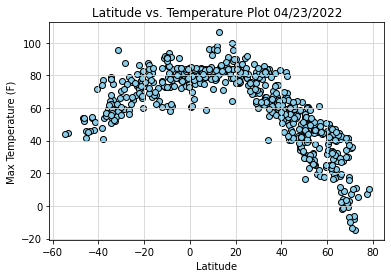

In [76]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Temperature Plot 04/23/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

This plot creates a visualization for the max temperatures of the cities within the datafram and how those
temperatures currently change depending on the location of the city based on its latitude. We will notice that 
currently, the further south the city is located, the cooler the current max temperature. 

## Latitude vs. Humidity Plot

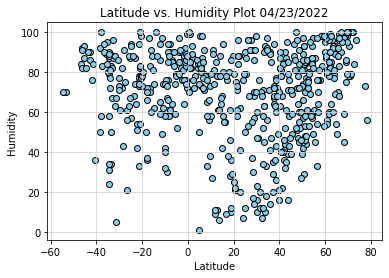

In [77]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Humidity Plot 04/23/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

This chart represents the percentage of humidity among the cities listed in the dataframe. Although the level of humidity is relatively diverse, we are able to see that currently, the overall level of humidity among most cities is 60% or higher.

## Latitude vs. Cloudiness Plot

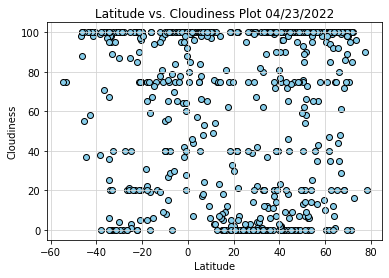

In [78]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Cloudiness Plot 04/23/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

This chart displays the level of cloudiness among the cities within the dataframe. This chart also demonstrates the low correlation between the latitude and the level of cloudiness in each city based on its latitude. 

## Latitude vs. Wind Speed Plot

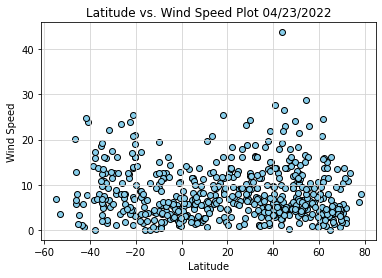

In [79]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Wind Speed Plot 04/23/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

This chart represents the correlation between wind speed and latitiudes among the cities in the dataframe. We are able to notice that wind speeds remain relatively consistent among all of the cities. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8602500154763848


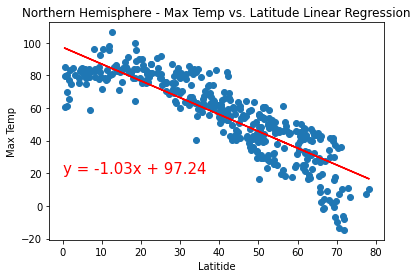

In [80]:
# plot the linear regression model
clean_city_data_northernhem = clean_city_data[clean_city_data['Lat'] > 0]
x_values = clean_city_data_northernhem['Lat']
y_values = clean_city_data_northernhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression' )
plt.xlabel('Latitide')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7114859079938466


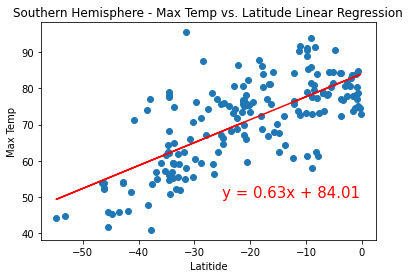

In [81]:
clean_city_data_southernhem = clean_city_data[clean_city_data['Lat'] < 0]
x_values = clean_city_data_southernhem['Lat']
y_values = clean_city_data_southernhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression' )
plt.xlabel('Latitide')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.savefig("fig6.png")
plt.show()

These two graphs represent the max temp observed among the cities listed in the dataframe. The two graphs are seperated by cities in the nothern and southern hemispheres. We can see that both graphs point to cities located closer to the equator experiencing higher max temperatures. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22602125572021323


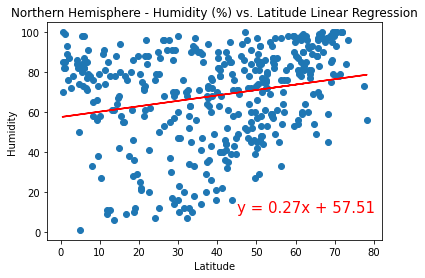

In [82]:
clean_city_data_northernhem = clean_city_data[clean_city_data['Lat'] > 0]
x_values = clean_city_data_northernhem['Lat']
y_values = clean_city_data_northernhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression' )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22602125572021323


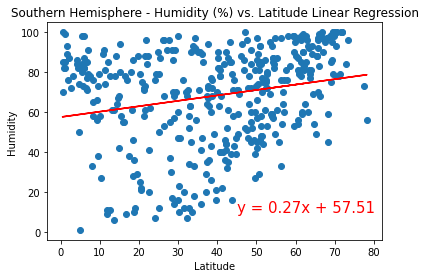

In [83]:
clean_city_data_southernhem = clean_city_data[clean_city_data['Lat'] > 0]
x_values = clean_city_data_southernhem['Lat']
y_values = clean_city_data_southernhem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression' )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.savefig("fig8.png")
plt.show()

These graphs show the relationship between the percentage of humidity observed by each city within the dataframe. Similar to the max temp analysis, we look at cities located in the nothern and southern hemispheres. These graphs also include a regression line as an additional analytical tool to observe any potential trends or relationships. In analyzing the level of humidity against the latitudes, we notice that although the humidity trends slightly higher the further away from the equator cities are located, this relationship is also limited as there is a very wide level of dispersion observed within the data. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16578576251059957


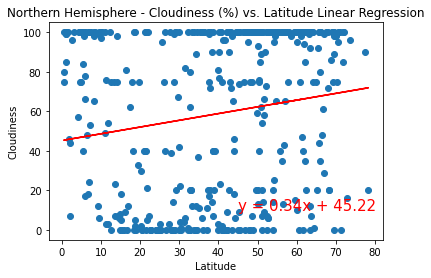

In [84]:
clean_city_data_northernhem = clean_city_data[clean_city_data['Lat'] > 0]
x_values = clean_city_data_northernhem['Lat']
y_values = clean_city_data_northernhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression' )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16578576251059957


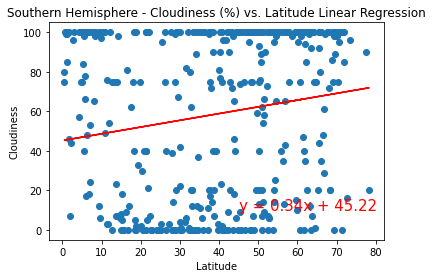

In [85]:
clean_city_data_southernhem = clean_city_data[clean_city_data['Lat'] > 0]
x_values = clean_city_data_southernhem['Lat']
y_values = clean_city_data_southernhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression' )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.savefig("fig10.png")
plt.show()

In these graphs we look at the levels of cloudiness observed in cities within the dataframe. Again we seperated the cities based on the hemispehere they are in. As we noticed in the overall analysis earlier, there is a low correlation between the level of cloudiess observed by a city based on the latitude they are located. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.04738652474753445


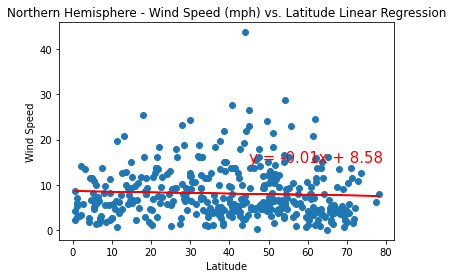

In [86]:
clean_city_data_northernhem = clean_city_data[clean_city_data['Lat'] > 0]
x_values = clean_city_data_northernhem['Lat']
y_values = clean_city_data_northernhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression' )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.savefig("fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.04738652474753445


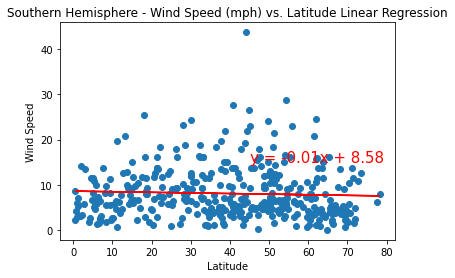

In [87]:
clean_city_data_southernhem = clean_city_data[clean_city_data['Lat'] > 0]
x_values = clean_city_data_southernhem['Lat']
y_values = clean_city_data_southernhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression' )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.savefig("fig12.png")
plt.show()

In these graphs we look at the levels of wind speeds observed in cities within the dataframe. Again we seperated the cities based on the hemispehere they are in. As we noticed in the overall analysis earlier, there is a low correlation between the level of wind speed observed by a city based on the latitude they are located, as wind speeds remain relatively even among a larger portion of the cities in both hemispheres. 